In [9]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [2]:
def SPF(aadt_major,aadt_minor,a,b,c):
    #if aadt_major>=aadt_minor:
        aadt_major = math.log(aadt_major)
        aadt_minor = math.log(aadt_minor)
        return(math.exp(a+b*aadt_major+c*aadt_minor))
def EB_w(aadt_major,aadt_minor,a,b,c,k):
    #if aadt_major>=aadt_minor:
        predicted = SPF(aadt_major,aadt_minor,a,b,c)
        return(1.0/(1+k*predicted))
def Expected(aadt_major,aadt_minor,a,b,c,k,observed):
    #if aadt_major>=aadt_minor:
        predicted = SPF(aadt_major,aadt_minor,a,b,c)
        w   = EB_w(aadt_major,aadt_minor,a,b,c,k)
        return(w*predicted+(1-w)*observed)
def PSI(aadt_major,aadt_minor,a,b,c,k,observed,method='HSM'):
    #if aadt_major>=aadt_minor:
        predicted = SPF(aadt_major,aadt_minor,a,b,c)
        w   = EB_w(aadt_major,aadt_minor,a,b,c,k)
        expected = Expected(aadt_major,aadt_minor,a,b,c,k,observed)
        if method == 'HSM':
            return(expected-predicted)
        if method == 'Proposed':
            return(observed-expected)

aadt_major_lim = (500,20000)
aadt_minor_lim = (500,10000)
resolution = 500
aadt_minor_r = range(aadt_major_lim[0],aadt_major_lim[1],int((aadt_major_lim[1]-aadt_major_lim[0])/resolution))
aadt_major_r = range(aadt_minor_lim[0],aadt_minor_lim[1],int((aadt_minor_lim[1]-aadt_minor_lim[0])/resolution))
Obs = 1
a,b,c,k = -10.5588,0.5144,0.4206,2.6442

<IPython.core.display.Javascript object>


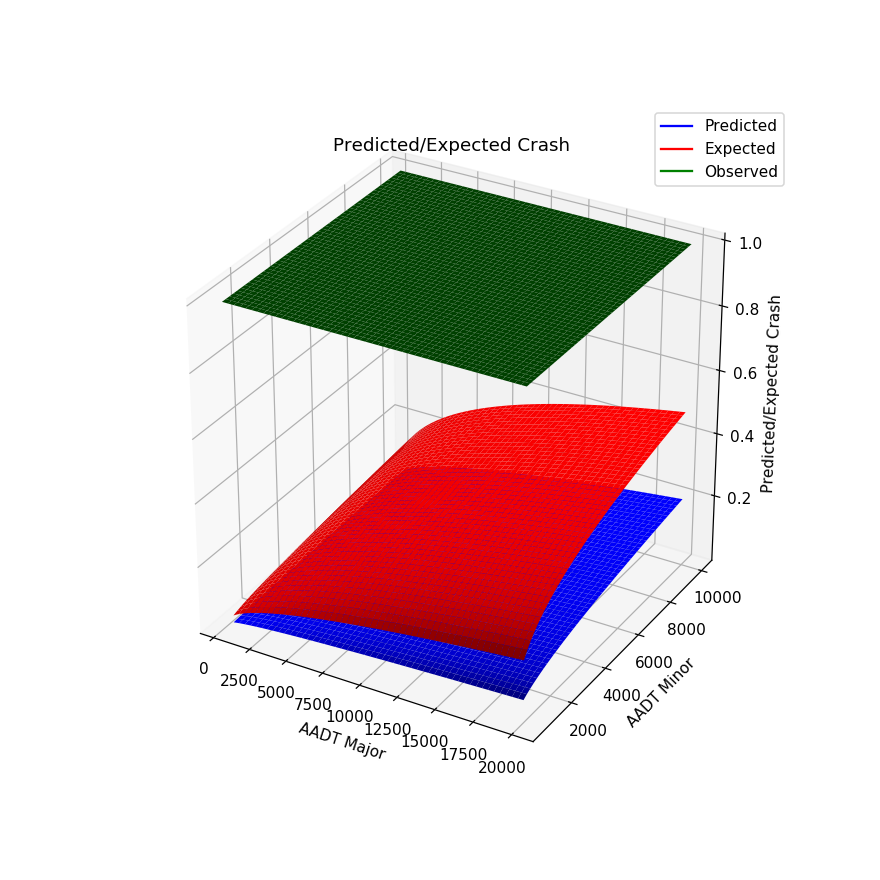

<IPython.core.display.Javascript object>


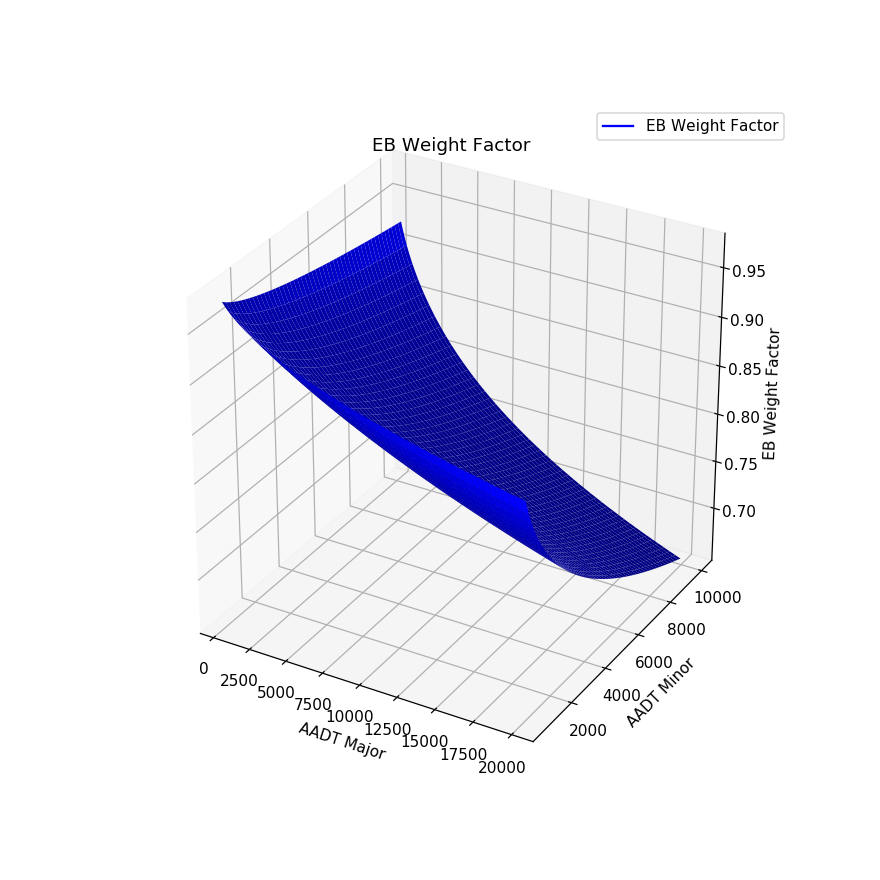

<IPython.core.display.Javascript object>


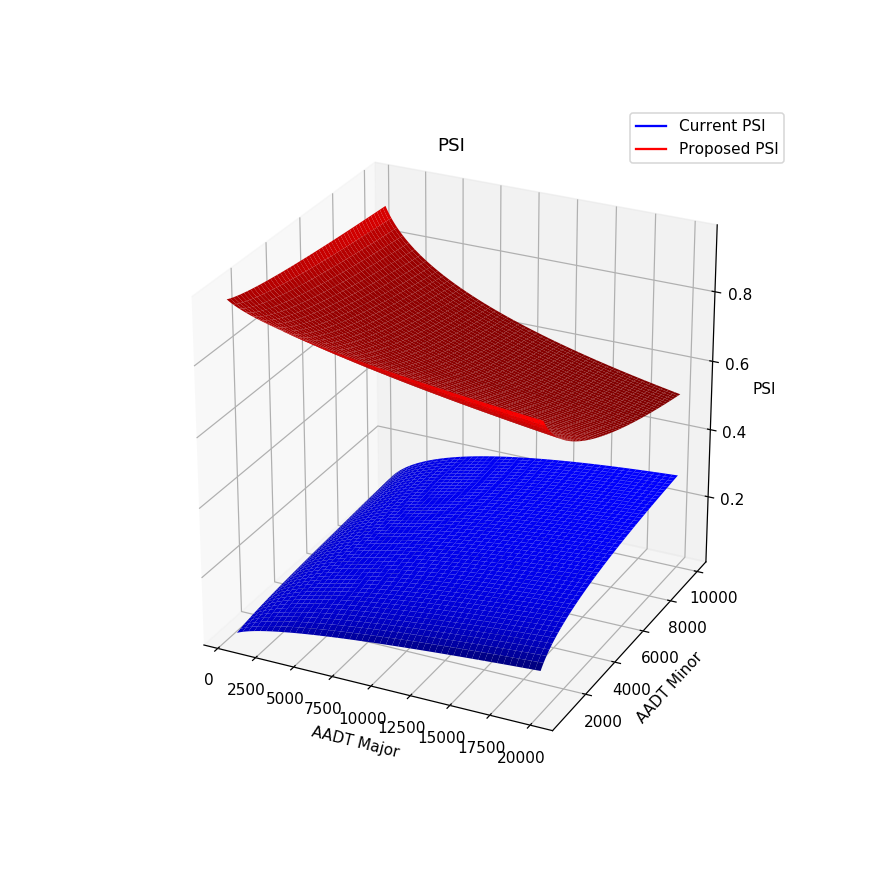

In [14]:
FigSize = (8,8)
x = np.array([[i]*len(aadt_major_r) for i in aadt_minor_r])
y = np.array([aadt_major_r for i in aadt_minor_r])
Npre = np.array([[SPF(i,j,a,b,c) for j in aadt_major_r] for i in aadt_minor_r])
eb_w = np.array([[EB_w(i,j,a,b,c,k) for j in aadt_major_r] for i in aadt_minor_r])
Nexp = np.array([[Expected(i,j,a,b,c,k,Obs) for j in aadt_major_r] for i in aadt_minor_r])
Nobs = np.array([[Obs for j in aadt_major_r] for i in aadt_minor_r])
PSI_HSM = np.array([[PSI(i,j,a,b,c,k,Obs,'HSM') for j in aadt_major_r] for i in aadt_minor_r])
PSI_Pro = np.array([[PSI(i,j,a,b,c,k,Obs,'Proposed') for j in aadt_major_r] for i in aadt_minor_r])
CL = ['blue','red','green']
for zL,t,labL in zip([[Npre,Nexp,Nobs],[eb_w],[PSI_HSM,PSI_Pro]],
                     ['Predicted/Expected Crash','EB Weight Factor','PSI'],
                     [['Predicted','Expected','Observed'],['EB Weight Factor'],['Current PSI','Proposed PSI']]):
    fig = plt.figure(figsize=FigSize)
    ax = fig.add_subplot(111, projection='3d')
    proxy_plot_l = []
    for z,C,l in zip(zL,CL,labL):
        #ax.plot_wireframe(x, y, z,color = C)
        ax.plot_surface(x, y, z,color = C,label=l)
        proxy_plot_l.append(matplotlib.lines.Line2D([0],[0], c=C))
    plt.xlabel('AADT Major')
    plt.ylabel('AADT Minor')
    plt.title(t)
    plt.gca().set_zlabel(t)
    plt.legend(proxy_plot_l, labL, numpoints = 1)
    plt.show()

<IPython.core.display.Javascript object>


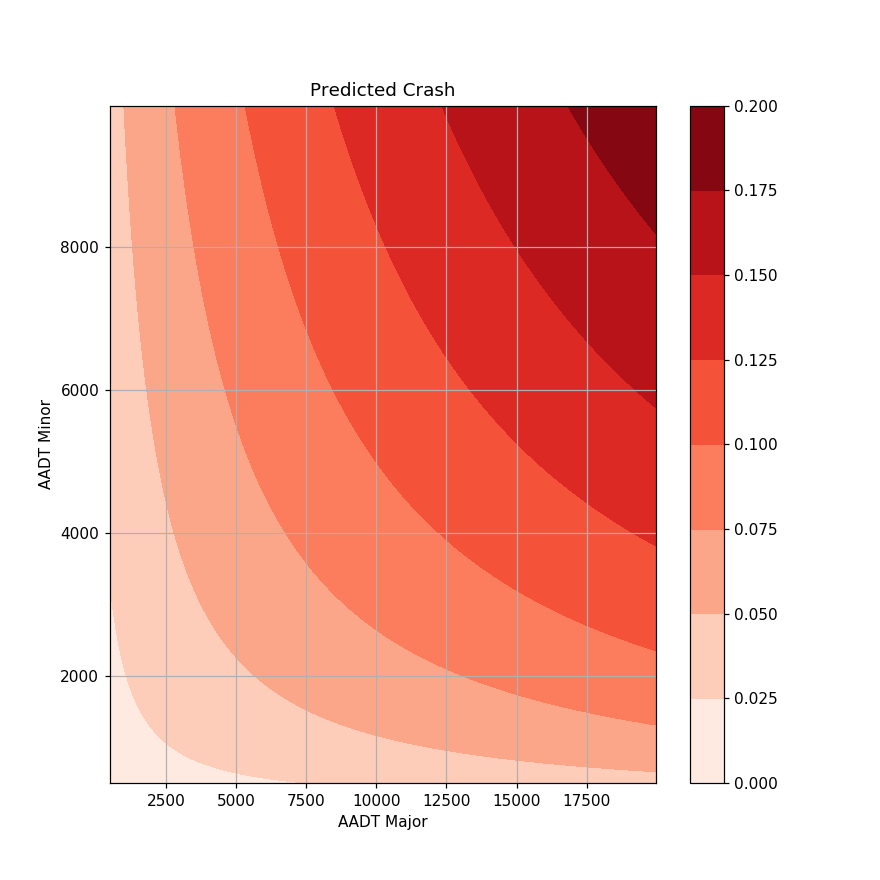

<IPython.core.display.Javascript object>


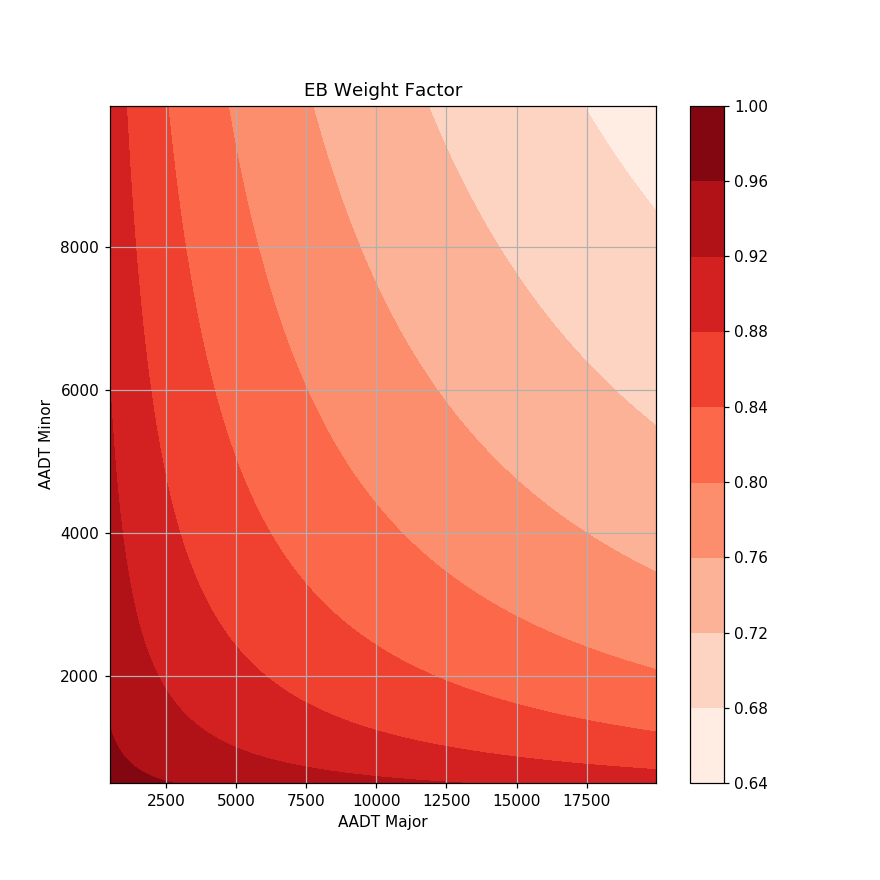

<IPython.core.display.Javascript object>


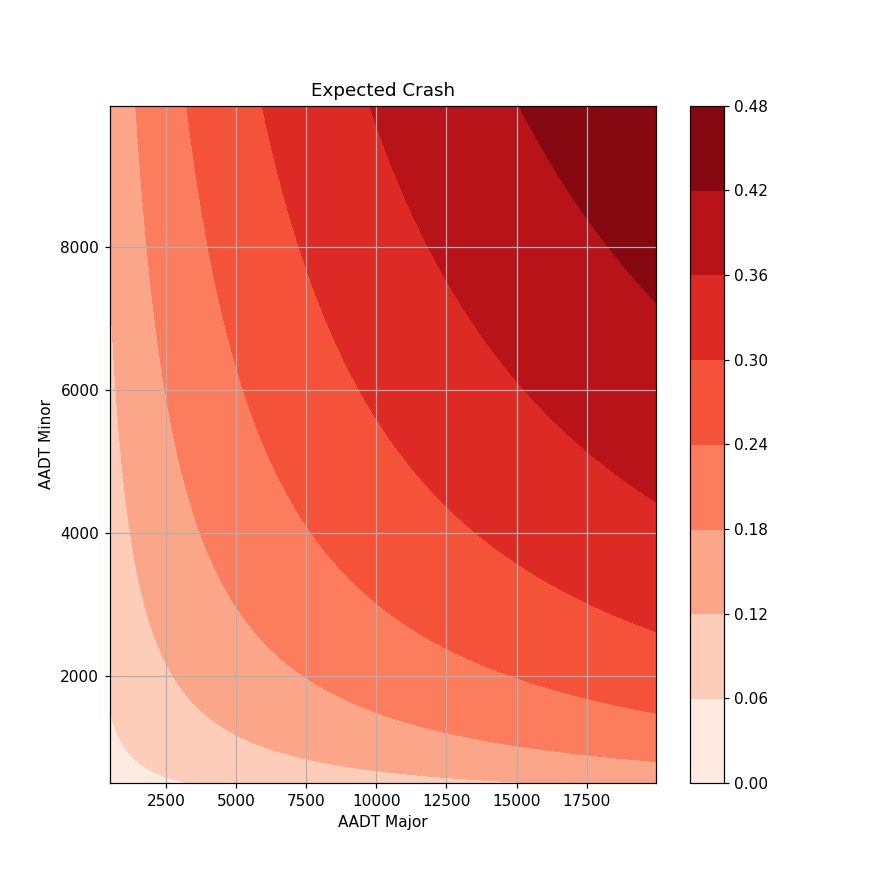

<IPython.core.display.Javascript object>


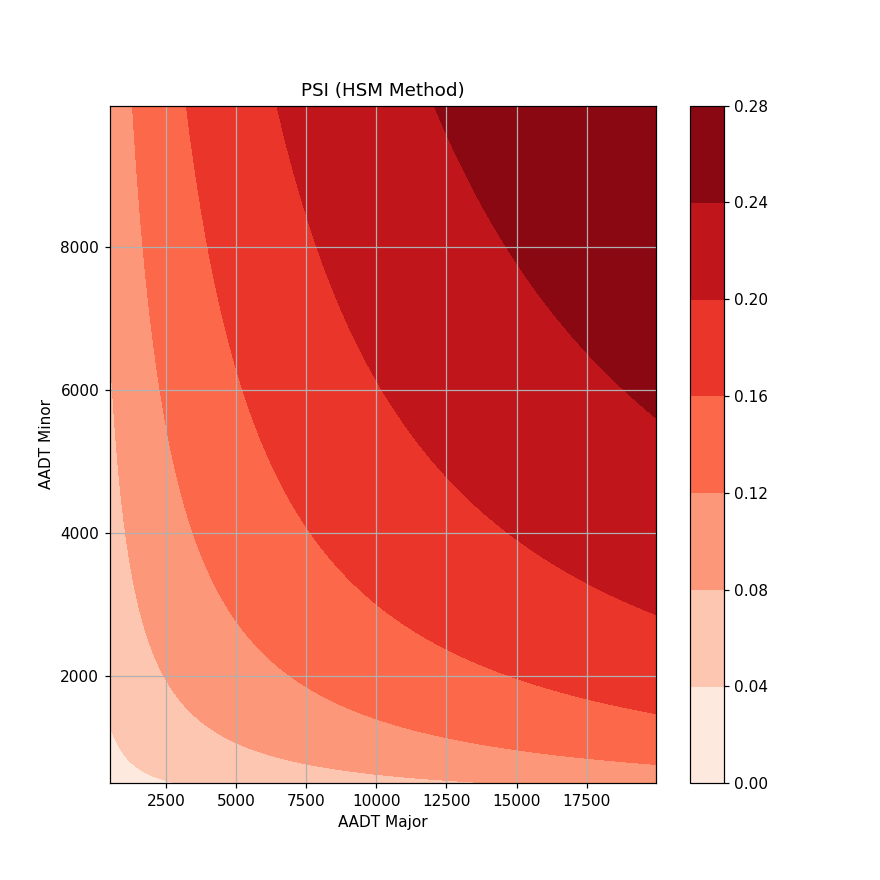

<IPython.core.display.Javascript object>


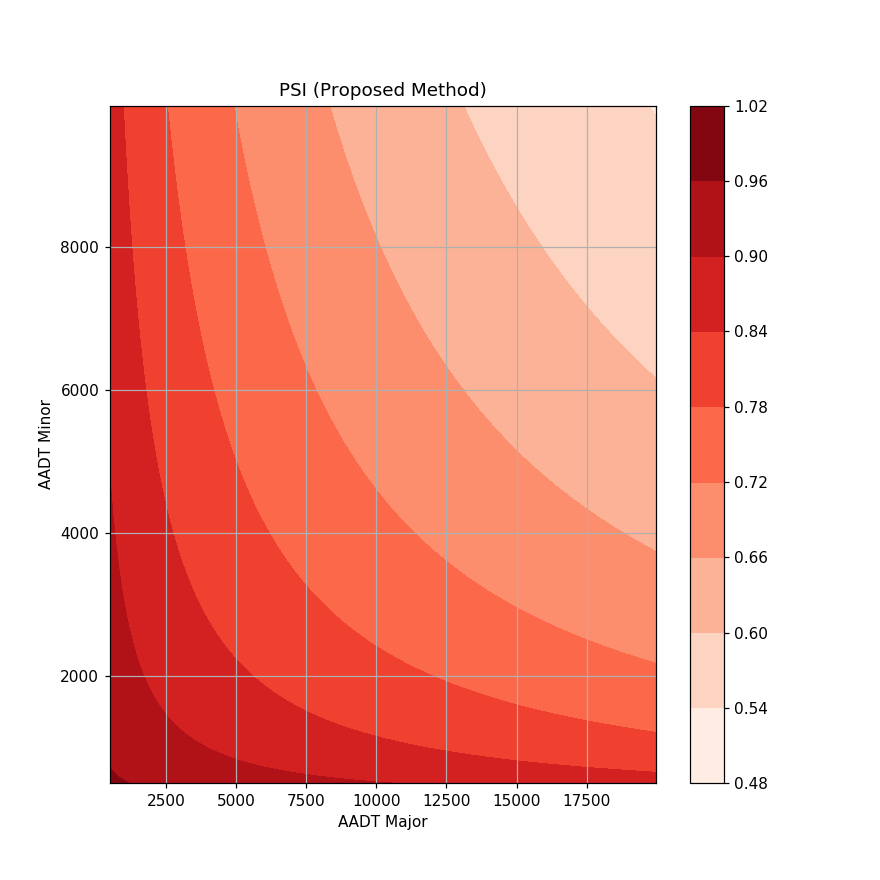

In [16]:
df = pd.DataFrame(columns=aadt_minor_r,index = aadt_major_r)
for y in df.columns:
    df[y] = df.index.to_series().apply(lambda x:SPF(x,y,a,b,c))
Npre_DF = df.T
df = pd.DataFrame(columns=aadt_minor_r,index = aadt_major_r)
for y in df.columns:
    df[y] = df.index.to_series().apply(lambda x:EB_w(x,y,a,b,c,k))
EBW_DF = df.T
df = pd.DataFrame(columns=aadt_minor_r,index = aadt_major_r)
for y in df.columns:
    df[y] = df.index.to_series().apply(lambda x:Expected(x,y,a,b,c,k,Obs))
Nexp_DF = df.T
df = pd.DataFrame(columns=aadt_minor_r,index = aadt_major_r)
for y in df.columns:
    df[y] = df.index.to_series().apply(lambda x:PSI(x,y,a,b,c,k,Obs,'HSM'))
PSI_HSM_DF = df.T
df = pd.DataFrame(columns=aadt_minor_r,index = aadt_major_r)
for y in df.columns:
    df[y] = df.index.to_series().apply(lambda x:PSI(x,y,a,b,c,k,Obs,'Proposed'))
PSI_Pro_DF = df.T

for df,t in zip([Npre_DF,EBW_DF,Nexp_DF,PSI_HSM_DF,PSI_Pro_DF],['Predicted Crash','EB Weight Factor','Expected Crash','PSI (HSM Method)','PSI (Proposed Method)']):
    plt.figure(figsize=(8,8))
    plt.contourf(aadt_minor_r,aadt_major_r,df,cmap=plt.cm.Reds)
    plt.xlabel('AADT Major')
    plt.ylabel('AADT Minor')
    plt.title(t)
    plt.colorbar()
    plt.grid()
    plt.show()

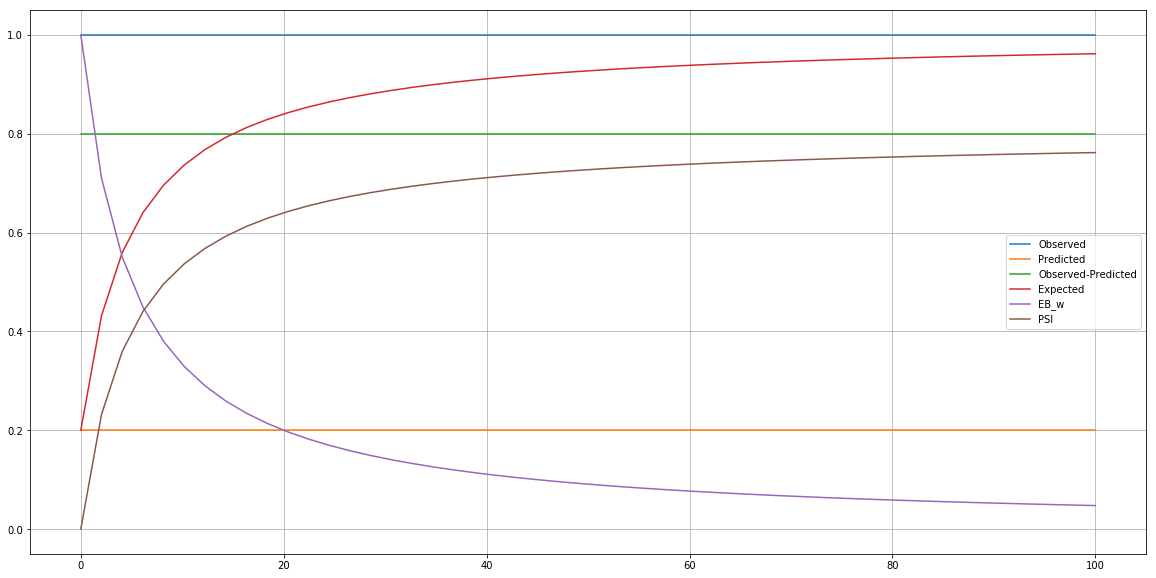

In [133]:
K_range = list(np.linspace(start=0,stop=100,retstep=0.5)[0])
spf = spf
Obs = Obs
df = pd.DataFrame(index =K_range,columns=['Observed','Predicted','Observed-Predicted','Expected','Overdispersion','EB_w','PSI'])
df['Observed'] = Obs
df['Predicted'] = spf
df['Observed-Predicted'] = df.Observed - df.Predicted
df['Overdispersion'] = K_range
df['EB_w'] = df.index.to_series().apply(lambda k:(1.0)/(1+k*spf))
#df['EB_w'] = df.EB_w.mean()
df['Expected'] = df.Predicted*df.EB_w + (1-df.EB_w)*df.Observed
df['PSI'] = df.Expected-df.Predicted

df[['Observed','Predicted','Observed-Predicted','Expected','EB_w','PSI']].plot(figsize=(20,10))
plt.grid()
#plt.xlabel('Predicted Value')
#plt.ylabel('Crash Frequency')
plt.show()

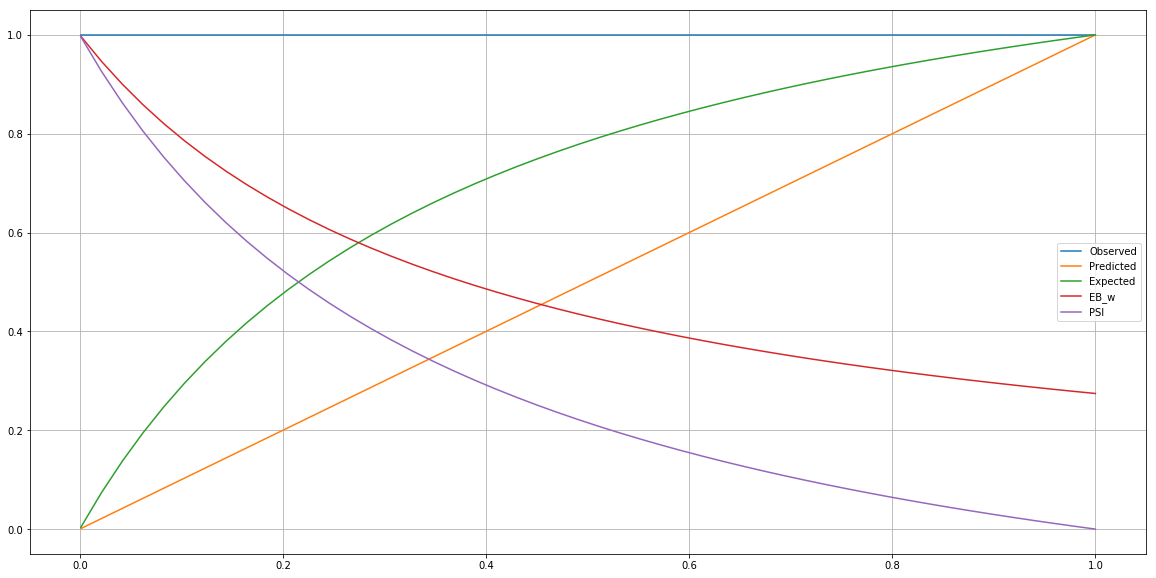

In [6]:
SPF_range = list(np.linspace(start=0.001,stop=1,retstep=0.0001)[0])
k = k
Obs = Obs
df = pd.DataFrame(index =SPF_range,columns=['Observed','Predicted','Observed-Predicted','Expected','EB_w','PSI'])
df['Observed'] = Obs
df['Predicted'] = SPF_range
df['Observed-Predicted'] = df.Observed - df.Predicted
df['Overdispersion'] = k
df['EB_w'] = df.index.to_series().apply(lambda spf:(1.0)/(1+k*spf))
#df['EB_w'] = df.EB_w.mean()
df['Expected'] = df.Predicted*df.EB_w + (1-df.EB_w)*df.Observed
#df['PSI'] = df.Expected-df.Predicted
df['PSI'] = df.Observed-df.Expected

df[['Observed','Predicted','Expected','EB_w','PSI']].plot(figsize=(20,10))
plt.grid()
#plt.xlabel('Predicted Value')
#plt.ylabel('Crash Frequency')
plt.show()